In [1]:
from sklearn.datasets import make_blobs,make_moons,make_circles
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X,y=make_blobs(n_samples=1000,centers=2,cluster_std=.72,random_state=0)

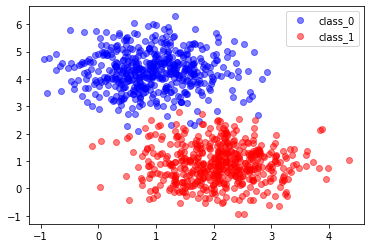

In [5]:

#plt.scatter(X[:,0],X[:,1],c=y)
plt.plot(X[y==0,0],X[y==0,1],'ob',label='class_0',alpha=0.5)
plt.plot(X[y==1,0],X[y==1,1],'or',label='class_1',alpha=0.5)
plt.legend()

### Generate datasets

In [6]:
X1, y1 = make_moons(n_samples=1000, noise=0.1)

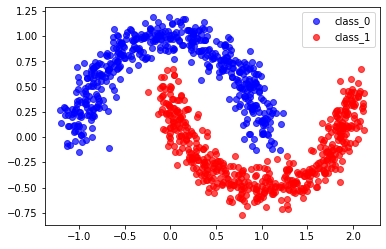

In [7]:
plt.plot(X1[y1==0,0],X1[y1==0,1],'ob',label='class_0',alpha=.7)
plt.plot(X1[y1==1,0],X1[y1==1,1],'or',label='class_1',alpha=.7)
plt.legend()

### Lets generate some complex dataset

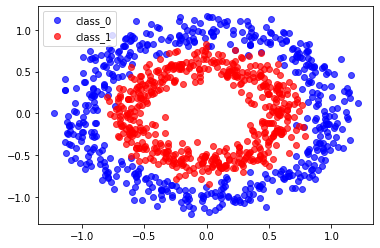

In [8]:
X2, y2 = make_circles(n_samples=1000, noise=0.1,factor=.6)
plt.plot(X2[y2==0,0],X2[y2==0,1],'ob',label='class_0',alpha=.7)
plt.plot(X2[y2==1,0],X2[y2==1,1],'or',label='class_1',alpha=.7)
plt.legend()

### split dataset

In [9]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X2,y2,test_size=.25,
                                             random_state=10)

In [10]:
xtrain.shape

(750, 2)

In [11]:
xtest.shape

(250, 2)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

### steps

- Create Model
- Add layers
- Compile Model
- Train Model (via fit)
- Evaluate performance

In [13]:
#simple sequential model
model = Sequential()

Add a dense layer with 1 neuron ..input_shape=(2,) means inputs will be array of the form
(*,2)..first dim is unspecified no of rows/batches and second dim is no of features

In [14]:
## Add layer
model.add(Dense(1,input_shape=(2,),activation='sigmoid'))

model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [16]:
### compile the model
### minimize the crossentropy for binary
model.compile(optimizer=Adam(learning_rate=.05),
              loss='binary_crossentropy',metrics=['accuracy'])

In [17]:
### fit the model with training data
history=model.fit(xtrain,ytrain,epochs=100)

Epoch 1/100
750/750 [==============================] - 0s 180us/sample - loss: 0.7213 - acc: 0.4787
Epoch 2/100
750/750 [==============================] - 0s 45us/sample - loss: 0.6992 - acc: 0.5560
Epoch 3/100
750/750 [==============================] - 0s 45us/sample - loss: 0.6951 - acc: 0.5373
Epoch 4/100
750/750 [==============================] - 0s 53us/sample - loss: 0.6979 - acc: 0.4600
Epoch 5/100
750/750 [==============================] - 0s 47us/sample - loss: 0.6953 - acc: 0.5027
Epoch 6/100
750/750 [==============================] - 0s 48us/sample - loss: 0.6948 - acc: 0.5187
Epoch 7/100
750/750 [==============================] - 0s 47us/sample - loss: 0.6946 - acc: 0.5480
Epoch 8/100
750/750 [==============================] - 0s 45us/sample - loss: 0.6952 - acc: 0.5147
Epoch 9/100
750/750 [==============================] - 0s 43us/sample - loss: 0.6947 - acc: 0.5387
Epoch 10/100
750/750 [==============================] - 0s 47us/sample - loss: 0.6959 - acc: 0.4533
Epoch 11

750/750 [==============================] - 0s 40us/sample - loss: 0.6952 - acc: 0.5227
Epoch 84/100
750/750 [==============================] - 0s 38us/sample - loss: 0.6962 - acc: 0.4960
Epoch 85/100
750/750 [==============================] - 0s 39us/sample - loss: 0.6958 - acc: 0.4400
Epoch 86/100
750/750 [==============================] - 0s 45us/sample - loss: 0.6943 - acc: 0.4933
Epoch 87/100
750/750 [==============================] - 0s 36us/sample - loss: 0.6964 - acc: 0.5293
Epoch 88/100
750/750 [==============================] - 0s 36us/sample - loss: 0.6960 - acc: 0.4880
Epoch 89/100
750/750 [==============================] - 0s 47us/sample - loss: 0.6968 - acc: 0.5427
Epoch 90/100
750/750 [==============================] - 0s 54us/sample - loss: 0.6945 - acc: 0.4920
Epoch 91/100
750/750 [==============================] - 0s 51us/sample - loss: 0.6947 - acc: 0.5213
Epoch 92/100
750/750 [==============================] - 0s 47us/sample - loss: 0.6947 - acc: 0.5667
Epoch 93/100


In [18]:
history.history.keys()

dict_keys(['loss', 'acc'])

In [22]:
history.history['acc'][-1]

0.5733333

In [23]:
result=model.evaluate(xtest,ytest)

250/250 [==============================] - 0s 191us/sample - loss: 0.6969 - acc: 0.5240


In [24]:
result

[0.6968989624977112, 0.524]

In [27]:
model.layers[0].get_weights()

[array([[0.08756519],
        [0.02805452]], dtype=float32),
 array([0.04176217], dtype=float32)]

In [28]:
weights = model.layers[0].get_weights()[0]
bias = model.layers[0].get_weights()[1]

In [29]:
weights

array([[0.08756519],
       [0.02805452]], dtype=float32)

In [30]:
bias

array([0.04176217], dtype=float32)

### create complex model

In [31]:
model = Sequential()
model.add(Dense(4,input_shape=(2,),activation='tanh',name='hidden_1'))
model.add(Dense(4,activation='tanh',name='hidden_2'))
model.add(Dense(4,activation='tanh',name='hidden_3'))
model.add(Dense(1,activation='sigmoid',name='output_layer'))

model.summary()
# 2 * 4 + 4 = 12
# 4 * 4 + 4 = 20
# 4 * 4 + 4 = 20
# 4 * 1 + 1 = 5

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_1 (Dense)             (None, 4)                 12        
_________________________________________________________________
hidden_2 (Dense)             (None, 4)                 20        
_________________________________________________________________
hidden_3 (Dense)             (None, 4)                 20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 5         
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.compile(optimizer=Adam(learning_rate=.05),loss='binary_crossentropy',
              metrics=['accuracy'])

In [33]:
history=model.fit(xtrain,ytrain,epochs=100)
# history=model.fit(xtrain,ytrain,epochs=100,verbose=0)

Epoch 1/100
750/750 [==============================] - 0s 210us/sample - loss: 0.6991 - acc: 0.4800
Epoch 2/100
750/750 [==============================] - 0s 57us/sample - loss: 0.6517 - acc: 0.6320
Epoch 3/100
750/750 [==============================] - 0s 56us/sample - loss: 0.4651 - acc: 0.8040
Epoch 4/100
750/750 [==============================] - 0s 48us/sample - loss: 0.1901 - acc: 0.9453
Epoch 5/100
750/750 [==============================] - 0s 61us/sample - loss: 0.1274 - acc: 0.9533
Epoch 6/100
750/750 [==============================] - 0s 52us/sample - loss: 0.1196 - acc: 0.9613
Epoch 7/100
750/750 [==============================] - 0s 56us/sample - loss: 0.1022 - acc: 0.9627
Epoch 8/100
750/750 [==============================] - 0s 63us/sample - loss: 0.1946 - acc: 0.9267
Epoch 9/100
750/750 [==============================] - 0s 59us/sample - loss: 0.1848 - acc: 0.9253
Epoch 10/100
750/750 [==============================] - 0s 51us/sample - loss: 0.0993 - acc: 0.9693
Epoch 11

750/750 [==============================] - 0s 45us/sample - loss: 0.0725 - acc: 0.9693
Epoch 84/100
750/750 [==============================] - 0s 43us/sample - loss: 0.0646 - acc: 0.9760
Epoch 85/100
750/750 [==============================] - 0s 48us/sample - loss: 0.0598 - acc: 0.9707
Epoch 86/100
750/750 [==============================] - 0s 43us/sample - loss: 0.0896 - acc: 0.9693
Epoch 87/100
750/750 [==============================] - 0s 43us/sample - loss: 0.0837 - acc: 0.9640
Epoch 88/100
750/750 [==============================] - 0s 47us/sample - loss: 0.1368 - acc: 0.9507
Epoch 89/100
750/750 [==============================] - 0s 54us/sample - loss: 0.1283 - acc: 0.9493
Epoch 90/100
750/750 [==============================] - 0s 43us/sample - loss: 0.1035 - acc: 0.9560
Epoch 91/100
750/750 [==============================] - 0s 44us/sample - loss: 0.0739 - acc: 0.9733
Epoch 92/100
750/750 [==============================] - 0s 56us/sample - loss: 0.0810 - acc: 0.9680
Epoch 93/100


In [36]:
history.history['acc'][-1]

0.9773333

In [37]:
result=model.evaluate(xtest,ytest)
result

250/250 [==============================] - 0s 195us/sample - loss: 0.1197 - acc: 0.9640


[0.11972913366556168, 0.964]

### callbacks

A callback is a set of functions to be applied at given stages of the training procedure. We can use callbacks to get a view on internal states and statistics of the model during training.

- Collect infomation on training

- Create Checkpoint:This callback will save our model as a checkpoint file (in hdf5 format) to disk after each successful epoch.

- EarlyStopping

- Tune Parameter while training(LearningRateScheduler)

- User-defined callbacks:This allows us to trigger events when an epoch, batch, or training process begins or ends.

### Adding Early stopping callback

In [38]:
from tensorflow.keras.callbacks import EarlyStopping

In [41]:
my_callback = [EarlyStopping(monitor='val_acc',patience=10,mode='max')]
#patience:if accuracy is not improving for 10 consecutive epochs,then stop training

In [42]:
model = Sequential()
model.add(Dense(4,input_shape=(2,),activation='tanh',name='hidden_1'))
model.add(Dense(4,activation='tanh',name='hidden_2'))
model.add(Dense(4,activation='tanh',name='hidden_3'))
model.add(Dense(1,activation='sigmoid',name='output_layer'))

model.compile(optimizer=Adam(learning_rate=.05),loss='binary_crossentropy',
              metrics=['accuracy'])

#model.fit(xtrain,ytrain,epochs=100,verbose=1,callbacks=my_callback)
model.fit(xtrain,ytrain,epochs=100,verbose=1,callbacks=my_callback,
          validation_data=(xtest,ytest))

Train on 750 samples, validate on 250 samples
Epoch 1/100
750/750 [==============================] - 0s 414us/sample - loss: 0.6876 - acc: 0.5533 - val_loss: 0.6876 - val_acc: 0.4880
Epoch 2/100
750/750 [==============================] - 0s 69us/sample - loss: 0.6496 - acc: 0.6067 - val_loss: 0.6291 - val_acc: 0.6200
Epoch 3/100
750/750 [==============================] - 0s 80us/sample - loss: 0.6015 - acc: 0.7000 - val_loss: 0.6511 - val_acc: 0.6600
Epoch 4/100
750/750 [==============================] - 0s 80us/sample - loss: 0.5527 - acc: 0.7253 - val_loss: 0.5398 - val_acc: 0.7120
Epoch 5/100
750/750 [==============================] - 0s 69us/sample - loss: 0.4281 - acc: 0.8160 - val_loss: 0.2959 - val_acc: 0.9040
Epoch 6/100
750/750 [==============================] - 0s 67us/sample - loss: 0.2070 - acc: 0.9360 - val_loss: 0.1791 - val_acc: 0.9280
Epoch 7/100
750/750 [==============================] - 0s 79us/sample - loss: 0.1267 - acc: 0.9600 - val_loss: 0.2383 - val_acc: 0.9000
E

### Saving and Restoring 

- **.save(file_path) : save model to hdf5 file**

- **.load_model(file_path) :load model from hdf5 file**

- **.save_weights(file_path) : save only model weights to hdf5 file**

- **.load_weights(file_path) :load model weights  from hdf5 file**

In [43]:
model.save("model.h5")

In [47]:
from tensorflow.keras.models import load_model

In [50]:
# m = load_model("model.h5")

In [51]:
# m
# m.evaluate(xtest,ytest)

In [52]:
model.save_weights(filepath='final_weight.h5')

**When restoring a model from weights-only, we must have a model with the same architecture as the original model.**

In [53]:
model = Sequential()
model.add(Dense(4,input_shape=(2,),activation='tanh',name='hidden_1'))
model.add(Dense(4,activation='tanh',name='hidden_2'))
model.add(Dense(4,activation='tanh',name='hidden_3'))
model.add(Dense(1,activation='sigmoid',name='output_layer'))

model.compile(optimizer=Adam(learning_rate=.05),loss='binary_crossentropy',
              metrics=['accuracy'])

In [55]:
# model.load_weights('final_weight.h5')

In [56]:
# model.evaluate(xtest,ytest)

### Functional API

Sequential Model is about adding layers sequence by sequence (sequentially),by  call the .add() method. 

Whereas, on the Functional API (specifically the Model class) we have more freedom, as we can define different layers that receive different inputs and 
then instantiate a model with the Model class using any of those layers (not necessarily in a step by step, or sequential way).

In [57]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Activation

#---Using the Sequential model
model = Sequential() #Object is instantiated here
model.add(Dense(32, input_dim=784,activation='relu'))


model.summary()
#---Or using the Functional API
a = Input(shape=(784,))
b = Dense(32, activation='relu')(a)
model = Model(inputs=a, outputs=b) #Object is instantiated here

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                25120     
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                25120     
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________


**Now, there is a major advantage of using the Functional API over the Sequential model, which is that we can share or reuse layers across different models.**



In [60]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

We creating layers by **calling layers with input tensors.**
When we call a layer with an input tensor, we get an output tensor.

In [62]:
inputs = Input(shape=(2,))

x = Dense(4,activation='tanh',name='hidden1')(inputs)
y = Dense(4,activation='tanh',name='hidden2')(x)
##use different variable in place of x if have any confusion

### output layer

out = Dense(1,activation='sigmoid',name='output')(y)

#create model with specified inputs and outputs

model = Model(inputs = inputs ,outputs = out)

model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
hidden1 (Dense)              (None, 4)                 12        
_________________________________________________________________
hidden2 (Dense)              (None, 4)                 20        
_________________________________________________________________
output (Dense)               (None, 1)                 5         
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________
